In [42]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from interact_utils import exp_name_, domain_, mode_, loss_map_, loss_type_, slices_, do_aver_, exp_names_
from ipywidgets import interact

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
SAVEPATH = './saved_models/'

@interact
def plot_loss(exp_name=exp_name_, domain=domain_, 
              loss_type=loss_type_, mode=mode_, slices=slices_, do_aver=do_aver_):
    domain = 0 if domain == 'H36M' else 1
    loss_type = loss_map_[loss_type]
    save_path = SAVEPATH+exp_name+'/'
    losses = th.load(save_path+'losses.pth')
    arr = losses[domain][loss_type][mode]#[slices[0]:slices[1]]
    xs = th.arange(len(arr))
    if do_aver == 'do averaging':
        params = th.load(save_path+'params.pth')
        num_batches = int(np.ceil(params['num_'+mode+'_imgs']/params['batch_size']))
        arr = th.tensor(arr).view(-1,num_batches).mean(dim=1)
        xs = th.arange(1,len(arr)+1)
    plt.semilogy(xs, arr)
    plt.title('exp {exp}, domain {domain}, mode {mode}'.format(exp=exp_name, domain=domain, mode=mode))

interactive(children=(ToggleButtons(description='exp name:', options=('ONE_FLOW_freeze_all', 'ONE_FLOW_freeze_…

In [38]:
from models import WholeNet
model = WholeNet(num_domains=1, do_da=False)

device = th.device('cpu')
exp_name = 'ONE_FLOW_freeze_wo1'
# exp_name = 'ONE_FLOW_freeze_all'
save_path = SAVEPATH+exp_name+'/'

In [39]:
epoch = 30

state = th.load(save_path+'state_{:04d}.pth'.format(epoch),
        map_location='cpu')
model.load_state_dict(state['state_dict'])

<All keys matched successfully>

In [36]:
idx = 11

import datasets
import datasets_utils

dataset = datasets.MPII(100, mode='train', use_heatmaps=True)
img, heatmap, _ = [elem.unsqueeze(0) for elem in dataset[idx]]
joints_orig = datasets_utils.heatmap2joints(heatmap)

p, _,_ = model(img)

joints = datasets_utils.heatmap2joints(p)

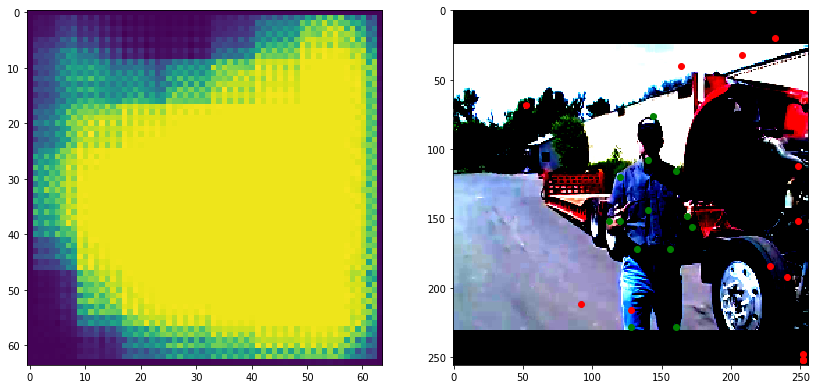

In [37]:
fig,ax = plt.subplots(1,2, figsize=(14,7))
ax[0].imshow(p[0,0].detach().numpy())
ax[0].imshow(p[0].sum(dim=0).detach().numpy())
ax[1].imshow(img[0].permute(1,2,0).numpy())
ax[1].plot(joints_orig[0][:,0], joints_orig[0][:,1], 'go');
ax[1].plot(joints[0][:,0], joints[0][:,1], 'ro');